# Using Heatmaps

In [1]:
import transportation_tutorials as tt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 100

## Questions

Prepare a heatmap that visualizes the joint distribution of the number of trips taken by
each household and the number of automobiles owned by the household.

1. For households with 2 automobiles, what is the most frequent number of trips made by
   those households in the data?
2. For households making 2 trips in the data, how many automobiles do most households own?

## Data

To answer the questions, use the following data files:

In [2]:
trip = pd.read_csv(tt.data('SERPM8-BASE2015-TRIPS'))
trip.head()

,hh_id,person_id,person_num,tour_id,stop_id,inbound,tour_purpose,orig_purpose,dest_purpose,orig_mgra,dest_mgra,parking_mgra,stop_period,trip_mode,trip_board_tap,trip_alight_tap,tour_mode,smplRate_geo,autotech,tncmemb
0,1690841,4502948,1,0,-1,0,Work,Home,Work,7736,9290,-1,8,6,0,0,6,1.0,0,0
1,1690841,4502948,1,0,-1,1,Work,Work,Home,9290,7736,0,29,3,0,0,6,1.0,0,0
2,1690841,4502948,1,1,-1,0,Work-Based,Work,Work-Based,9290,7980,-1,13,1,0,0,1,1.0,0,0
3,1690841,4502948,1,1,-1,1,Work-Based,Work-Based,Work,7980,9290,-1,14,1,0,0,1,1.0,0,0
4,1690841,4502948,1,2,-1,0,Work-Based,Work,Work-Based,9290,10608,-1,19,3,0,0,3,1.0,0,0


In [3]:
hh = pd.read_csv(tt.data('SERPM8-BASE2015-HOUSEHOLDS'))
hh.head()

,Unnamed: 0,hh_id,home_mgra,income,autos,transponder,cdap_pattern,jtf_choice,autotech,tncmemb
0,426629,1690841,7736,512000,2,1,MMMM0,0,0,0
1,426630,1690961,7736,27500,1,0,MNMM0,0,0,0
2,426631,1690866,7736,150000,2,0,HMM0,0,0,0
3,426632,1690895,7736,104000,2,1,MMMM0,0,0,0
4,426633,1690933,7736,95000,2,1,MNM0,0,0,0


## Solution

To find the number of trips that each household makes, we can create a dummy column with value `1` and use `.groupby()` method to count the total number of trips for each household. Then, we merge this information with household information to get the final dataframe. 

In [4]:
hh_trip_count = trip.groupby(['hh_id']).size().rename('trip_count')

In [5]:
hh_trip_count.head()

hh_id
1690841    20
1690851    12
1690853     8
1690856    23
1690858     5
Name: trip_count, dtype: int64

In [6]:
data = pd.merge(hh_trip_count, hh, on = 'hh_id', how = 'left')

In [7]:
data.head()

,hh_id,trip_count,Unnamed: 0,home_mgra,income,autos,transponder,cdap_pattern,jtf_choice,autotech,tncmemb
0,1690841,20,426629,7736,512000,2,1,MMMM0,0,0,0
1,1690851,12,426645,7736,68200,4,1,HNM0,0,0,0
2,1690853,8,426643,7736,127000,2,0,MMMH0,0,0,0
3,1690856,23,426642,7736,59500,4,1,MNMMMM0,0,0,0
4,1690858,5,426640,7736,200030,1,0,M0,0,0,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17260 entries, 0 to 17259
Data columns (total 11 columns):
hh_id           17260 non-null int64
trip_count      17260 non-null int64
Unnamed: 0      17260 non-null int64
home_mgra       17260 non-null int64
income          17260 non-null int64
autos           17260 non-null int64
transponder     17260 non-null int64
cdap_pattern    17260 non-null object
jtf_choice      17260 non-null int64
autotech        17260 non-null int64
tncmemb         17260 non-null int64
dtypes: int64(10), object(1)
memory usage: 1.6+ MB


Then we create a pivot table using `autos` and `trip_count` columns in the dataframe as `index` and `columns` in `.pivot_table()` method. We use `aggfunc = 'size'` to get the count of households in this two-dimensional table. 

In [9]:
data_pivot = data.pivot_table(index = 'autos', columns = 'trip_count', aggfunc = 'size')

Finally, we create a heatmap using `seaborn` package. We can adjust the height and width of the heatmap using `plt.figure(figsize = (width, height))`. Please make sure to specify the figure size before creating heatmap. 

We can set `annot = True` in `sns.heatmap()` to get the numbers visible in the plot. Also, there are some other arguments that we can specify to get the heatmap in desirable format. 

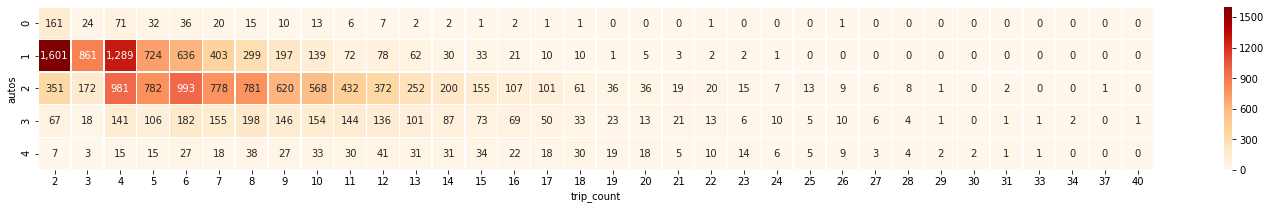

In [10]:
plt.figure(figsize = (25, 3))
ax = sns.heatmap(data_pivot.fillna(0), annot = True, fmt = ",.0f", linewidths=.5, cmap = 'OrRd')

From the heatmap that we just created, we can easily find answers looking at the numbers as well as color map. 

For households with 2 automobiles, 6 is the most common number of trips per day, although 4 trips is a close runner-up.

For households making only 2 trips in a day, the vast majority of them have 1 automobile.